# **NATURAL LANGUAGE PROCESSING PROJECT**

# **<631-  Patient's Condition Classification Using Drug Reviews>**

**Business Objective:**

This is a sample dataset which consists of 161297 drug name, condition reviews and ratings from different patients and our goal is to examine how patients are feeling using the drugs their positive and negative experiences so that we can recommend him a suitable drug. By analyzing the reviews, we can understand the drug effectiveness and its side effects.
The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.

So in this dataset, we can see many patients conditions but we will focus only on the below, classify the below conditions from the patients reviews

a. Depression

c. High Blood Pressure

d. Diabetes, Type 2


**Attribute Information:**

1. DrugName (categorical): name of drug

2. condition (categorical): name of condition

3. review (text): patient review

4. rating (numerical): 10 star patient rating

5. date (date): date of review entry

6. usefulCount (numerical): number of users who found review useful



# Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
import nltk
nltk.download('all')#1

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [3]:
import spacy
nlp=spacy.load('en_core_web_sm')
import re
from nltk.stem import WordNetLemmatizer

In [4]:
!pip install textblob
from textblob import TextBlob

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [8]:
from sklearn.pipeline import Pipeline

In [9]:
from sklearn.linear_model import LogisticRegressionCV
log_model=LogisticRegressionCV()

In [10]:
from sklearn.metrics import roc_auc_score,roc_curve

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

In [12]:
from sklearn.metrics import classification_report,precision_recall_fscore_support,accuracy_score

In [13]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [14]:
from sklearn.svm import SVC

In [15]:
from sklearn.decomposition import PCA

In [16]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [17]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [18]:
import xgboost as xgb

In [19]:
import lightgbm as lgb

In [20]:
import keras
import tensorflow as tf

In [21]:
from tensorflow.keras.layers import TextVectorization,Embedding

In [22]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS

In [23]:
!pip install afinn
from afinn import Afinn

In [24]:
!pip install streamlit
import streamlit as st
import pickle

In [25]:
import getpass

In [26]:
!pip install streamlit pyngrok

In [27]:
from pyngrok import ngrok

# Datasets

In [40]:
df=pd.read_excel('/content/drugsCom_raw.xlsx')

In [41]:
original=df.copy()

In [42]:
afin=Afinn()
afin=afin._dict
print(afin)

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'aborted': -1, 'aborts': -1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusing': -3, 'abusive': -3, 'accept': 1, 'acceptable': 1, 'acceptance': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accessible': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'acclaim': 2, 'acclaimed': 2, 'accolade': 2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accomplishment': 2, 'accomplishments': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admir

In [43]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


# Cleaning Data

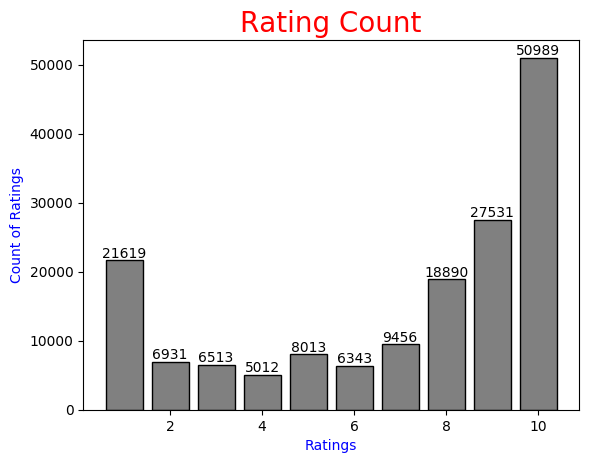

In [44]:
rating_count=df.groupby('rating')['review'].agg(['count']).reset_index()
plt.bar(rating_count['rating'],rating_count['count'],color='grey',edgecolor='black')

plt.style.use('_classic_test_patch')

plt.title('Rating Count',size=20,color='red')
plt.xlabel('Ratings',color='blue')
plt.ylabel('Count of Ratings',color='blue')

for x in range(len(rating_count)):
  plt.text(x+1,rating_count['count'][x],rating_count['count'][x],ha='center',va='bottom')

In [45]:
df=df.drop(columns=['Unnamed: 0','date'])
df.head()

,drugName,condition,review,rating,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,37


In [46]:
df.isnull().sum().sum()/len(df)*100

np.float64(0.5573569254232875)

In [47]:
df.dropna(inplace=True)
df.isnull().sum()

,0
drugName,0
condition,0
review,0
rating,0
usefulCount,0


In [48]:
df.duplicated().sum()

np.int64(0)

In [49]:
data=df[(df['condition']=='Depression') |(df['condition']=='High Blood Pressure') | (df['condition']=='Diabetes, Type 2')]
data.head()

,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13944 entries, 11 to 161290
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   drugName     13944 non-null  object
 1   condition    13944 non-null  object
 2   review       13944 non-null  object
 3   rating       13944 non-null  int64 
 4   usefulCount  13944 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 653.6+ KB


In [51]:
for x in data.columns:
  print(f'{x}\t {len(data[x].unique())}')
  print('-'*30)
  print('-'*30)

drugName	 334
------------------------------
------------------------------
condition	 3
------------------------------
------------------------------
review	 9802
------------------------------
------------------------------
rating	 10
------------------------------
------------------------------
usefulCount	 300
------------------------------
------------------------------


In [52]:
def cleaning(txt):
  rev=' '.join(re.findall('\w+',txt))
  rev_s=nlp(rev)
  clean=[x.lemma_ for x in rev_s if not x.is_stop
         and not x.is_punct and not x.is_digit
         and not x.is_bracket and not x.is_currency]
  return clean

In [53]:
data['review']=[cleaning(i) for i in data['review']]
data.head()#6

,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,"[take, anti, depressant, year, improvement, mo...",10,54
31,Sertraline,Depression,"[week, Zoloft, anxiety, mood, swing, mg, morni...",8,3
44,Venlafaxine,Depression,"[gp, start, Venlafaxine, yesterday, help, depr...",4,3
50,Dulaglutide,"Diabetes, Type 2","[hey, guy, s, month, post, want, month, go, wo...",10,24
67,Effexor XR,Depression,"[medicine, save, life, wit, end, anti, depress...",10,166


In [54]:
cleaned_data=data.copy()

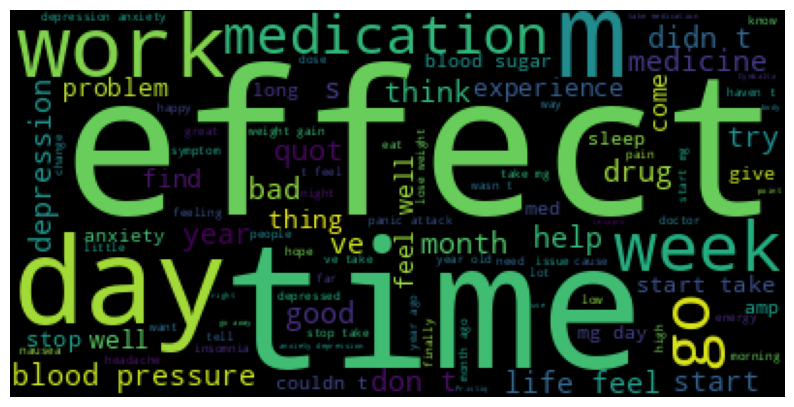

In [55]:
stop=STOPWORDS.add('FullStack')
all_word=' '.join([' '.join(x) for x in data['review']])
word=WordCloud(background_color='black',max_words=100,stopwords=stop).generate(all_word)
def word_cloud(image):
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.axis('off')
  plt.savefig('wordcloud.jpeg')
word_cloud(word)

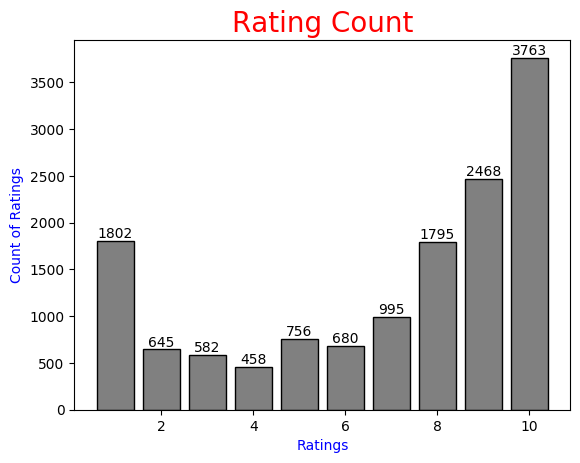

In [56]:
rate_count=data.groupby('rating')['review'].agg(['count']).reset_index()
plt.bar(rate_count['rating'],rate_count['count'],color='grey',edgecolor='black')

plt.style.use('_classic_test_patch')

plt.title('Rating Count',size=20,color='red')
plt.xlabel('Ratings',color='blue')
plt.ylabel('Count of Ratings',color='blue')

for x in range(len(rate_count)):
  plt.text(x+1,rate_count['count'][x],rate_count['count'][x],ha='center',va='bottom')

# Sentiment Analysis

## Lexicon Approach

### Affin Dataset

In [57]:
def sent(txt:list=None):
  cnt=0
  if txt:
    for x in txt:
      cnt+=afin.get(x,0)
  return cnt

In [59]:
aff=data.copy()
aff['sent']=aff.review.apply(lambda x:sent(x))
aff.head()

,drugName,condition,review,rating,usefulCount,sent
11,L-methylfolate,Depression,"[take, anti, depressant, year, improvement, mo...",10,54,4
31,Sertraline,Depression,"[week, Zoloft, anxiety, mood, swing, mg, morni...",8,3,-6
44,Venlafaxine,Depression,"[gp, start, Venlafaxine, yesterday, help, depr...",4,3,-2
50,Dulaglutide,"Diabetes, Type 2","[hey, guy, s, month, post, want, month, go, wo...",10,24,4
67,Effexor XR,Depression,"[medicine, save, life, wit, end, anti, depress...",10,166,5


In [60]:
aff.to_csv('test.csv')

In [ ]:
aff['pos/neg']=aff.sent.apply(lambda x:'Pos' if x>0 else 'Neg' if x<0 else 'Neu')
aff.head()

,drugName,condition,review,rating,usefulCount,sent,pos/neg
11,L-methylfolate,Depression,"[take, anti, depressant, year, improvement, mo...",10,54,4,Pos
31,Sertraline,Depression,"[week, Zoloft, anxiety, mood, swing, mg, morni...",8,3,-6,Neg
44,Venlafaxine,Depression,"[gp, start, Venlafaxine, yesterday, help, depr...",4,3,-2,Neg
50,Dulaglutide,"Diabetes, Type 2","[hey, guy, s, month, post, want, month, go, wo...",10,24,4,Pos
67,Effexor XR,Depression,"[medicine, save, life, wit, end, anti, depress...",10,166,5,Pos


### Text Blob

In [ ]:
def blb(txt:list=None):
  sen=TextBlob(' '.join(txt)).sentiment.polarity
  return sen

In [ ]:
blob=data.copy()
blob['sent']=blob.review.apply(lambda x:blb(x))
blob.head()

,drugName,condition,review,rating,usefulCount,sent
11,L-methylfolate,Depression,"[take, anti, depressant, year, improvement, mo...",10,54,0.139286
31,Sertraline,Depression,"[week, Zoloft, anxiety, mood, swing, mg, morni...",8,3,-0.500000
44,Venlafaxine,Depression,"[gp, start, Venlafaxine, yesterday, help, depr...",4,3,-0.269312
50,Dulaglutide,"Diabetes, Type 2","[hey, guy, s, month, post, want, month, go, wo...",10,24,0.250000
67,Effexor XR,Depression,"[medicine, save, life, wit, end, anti, depress...",10,166,0.243704


In [ ]:
blob['pos/neg']=blob.sent.apply(lambda x:'Pos' if x>0 else 'Neg' if x<0 else 'Neu')
blob.head()

,drugName,condition,review,rating,usefulCount,sent,pos/neg
11,L-methylfolate,Depression,"[take, anti, depressant, year, improvement, mo...",10,54,0.139286,Pos
31,Sertraline,Depression,"[week, Zoloft, anxiety, mood, swing, mg, morni...",8,3,-0.500000,Neg
44,Venlafaxine,Depression,"[gp, start, Venlafaxine, yesterday, help, depr...",4,3,-0.269312,Neg
50,Dulaglutide,"Diabetes, Type 2","[hey, guy, s, month, post, want, month, go, wo...",10,24,0.250000,Pos
67,Effexor XR,Depression,"[medicine, save, life, wit, end, anti, depress...",10,166,0.243704,Pos


### Vader

In [ ]:
def vad(txt):
  snt=SentimentIntensityAnalyzer()
  return snt.polarity_scores(' '.join(txt))['compound']

In [ ]:
vader=data.copy()
vader['sent']=vader.review.apply(lambda x:vad(x))#1
vader.head()

,drugName,condition,review,rating,usefulCount,sent
11,L-methylfolate,Depression,"[take, anti, depressant, year, improvement, mo...",10,54,-0.4767
31,Sertraline,Depression,"[week, Zoloft, anxiety, mood, swing, mg, morni...",8,3,-0.6908
44,Venlafaxine,Depression,"[gp, start, Venlafaxine, yesterday, help, depr...",4,3,-0.6486
50,Dulaglutide,"Diabetes, Type 2","[hey, guy, s, month, post, want, month, go, wo...",10,24,0.2960
67,Effexor XR,Depression,"[medicine, save, life, wit, end, anti, depress...",10,166,-0.0642


In [ ]:
vader['pos/neg']=vader.sent.apply(lambda x:'Pos' if x>0 else 'Neg' if x<0 else 'Neu')
vader.head()

,drugName,condition,review,rating,usefulCount,sent,pos/neg
11,L-methylfolate,Depression,"[take, anti, depressant, year, improvement, mo...",10,54,-0.4767,Neg
31,Sertraline,Depression,"[week, Zoloft, anxiety, mood, swing, mg, morni...",8,3,-0.6908,Neg
44,Venlafaxine,Depression,"[gp, start, Venlafaxine, yesterday, help, depr...",4,3,-0.6486,Neg
50,Dulaglutide,"Diabetes, Type 2","[hey, guy, s, month, post, want, month, go, wo...",10,24,0.2960,Pos
67,Effexor XR,Depression,"[medicine, save, life, wit, end, anti, depress...",10,166,-0.0642,Neg


## Visuals

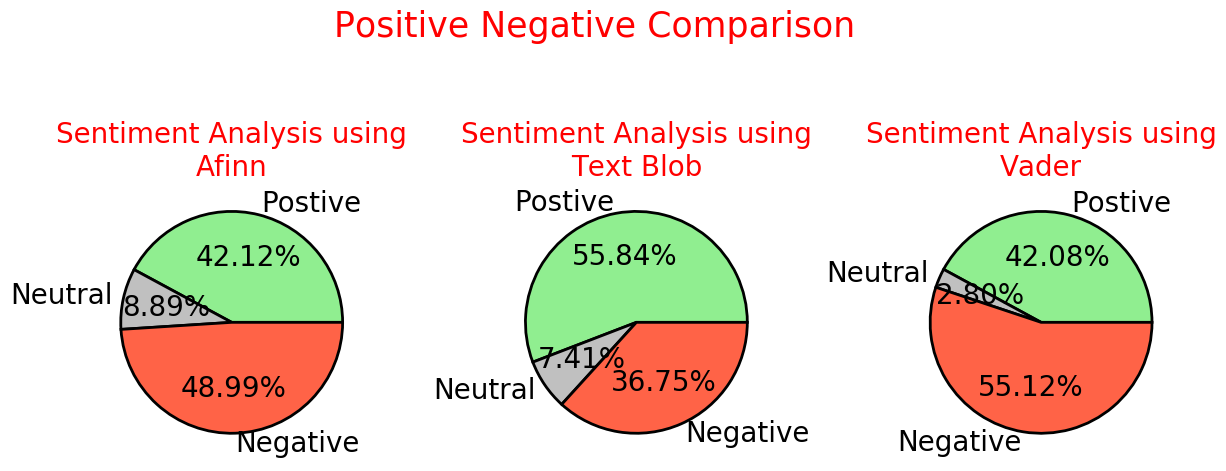

In [ ]:
plt.figure(figsize=(12,6))
for i,a,nm in zip([1, 2, 3],[aff, blob, vader],['Afinn','Text Blob','Vader']):
  plt.suptitle('Positive Negative Comparison',size=25,color='red')
  plt.subplot(1,3,i)
  a_pn=a.groupby('pos/neg')['review'].agg(['count']).reset_index().sort_values(by='pos/neg',ascending=False)
  plt.pie(a_pn['count'],labels=['Postive','Neutral','Negative'],colors=['lightgreen','silver','tomato'],wedgeprops={'linewidth':2,'edgecolor':'black'},textprops={'size':20},autopct='%.2f%%')
  plt.title(f'Sentiment Analysis using\n{nm}',size=20,color='red')
plt.tight_layout()

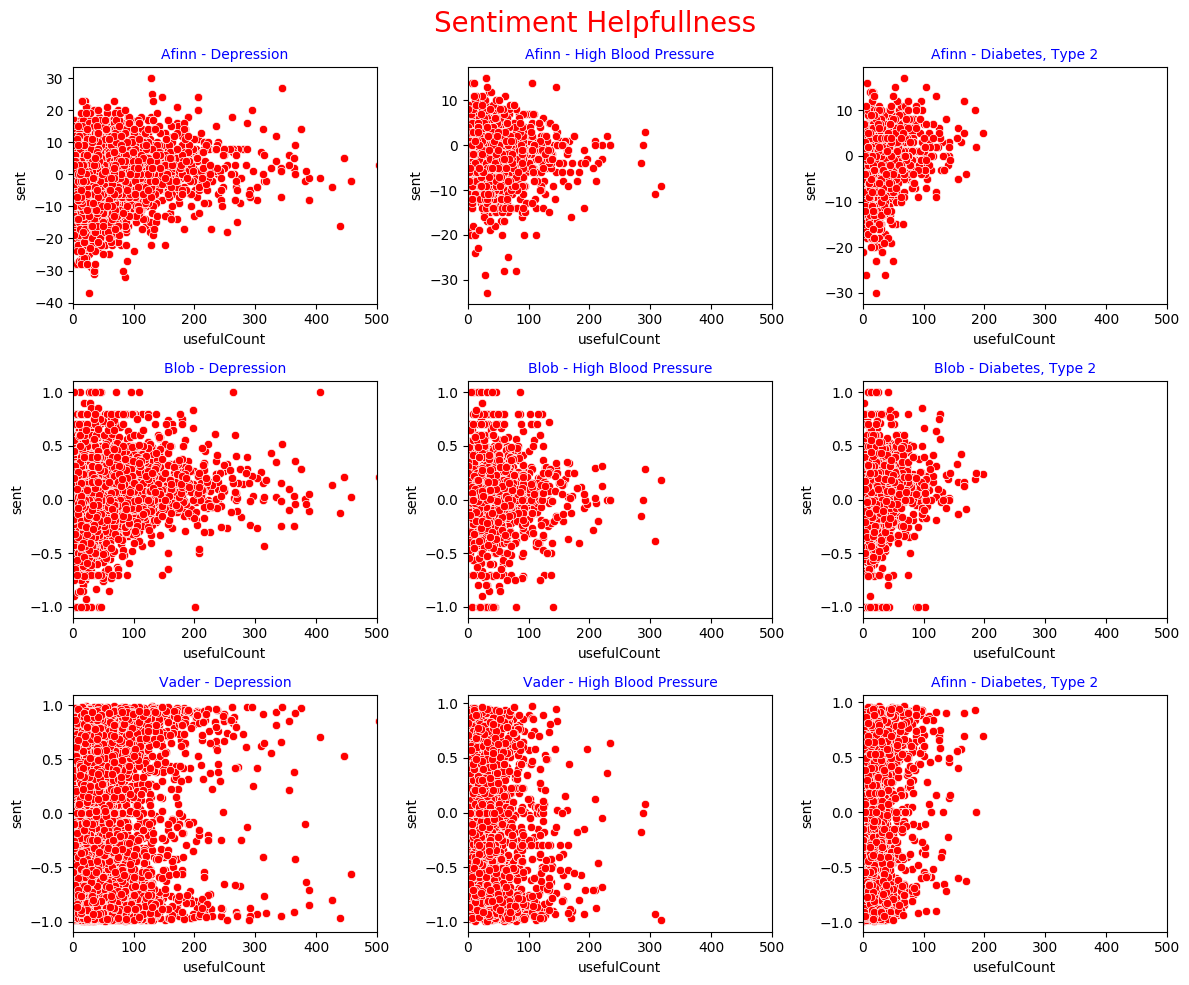

In [ ]:
plt.figure(figsize=(12,10))
plt.suptitle('Sentiment Helpfullness',size=20,color='red')

plt.subplot(3,3,1)
plt.title('Afinn - Depression',size=10,color='blue')
x=aff[aff['condition']=='Depression']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,2)
plt.title('Afinn - High Blood Pressure',size=10,color='blue')
x=aff[aff['condition']=='High Blood Pressure']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,3)
plt.title('Afinn - Diabetes, Type 2',size=10,color='blue')
x=aff[aff['condition']=='Diabetes, Type 2']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,4)
plt.title('Blob - Depression',size=10,color='blue')
x=blob[blob['condition']=='Depression']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,5)
plt.title('Blob - High Blood Pressure',size=10,color='blue')
x=blob[blob['condition']=='High Blood Pressure']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,6)
plt.title('Blob - Diabetes, Type 2',size=10,color='blue')
x=blob[blob['condition']=='Diabetes, Type 2']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,7)
plt.title('Vader - Depression',size=10,color='blue')
x=vader[vader['condition']=='Depression']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,8)
plt.title('Vader - High Blood Pressure',size=10,color='blue')
x=vader[vader['condition']=='High Blood Pressure']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.subplot(3,3,9)
plt.title('Afinn - Diabetes, Type 2',size=10,color='blue')
x=vader[vader['condition']=='Diabetes, Type 2']
sns.scatterplot(data=x,y='sent',x='usefulCount',color='red')
plt.xlim(0,500)

plt.tight_layout()

In [ ]:
def drug_sentiment(condition,drug):
  plt.figure(figsize=(12,6))
  plt.suptitle(f'{drug} for {condition}',size=20,color='red')
  for id,method,title in zip([1, 2, 3],[aff, blob, vader],['Afinn','Text Blob','Vader']):
    plt.subplot(1,3,id)
    df=method[(method['drugName']==drug) & (method['condition']==condition)]
    df1=df.groupby('pos/neg')['sent'].mean().round(2).reset_index()
    plt.bar(df1['pos/neg'],df1['sent'],color='grey',edgecolor='black')
    plt.title(f'{title} Method\nOverall {df['pos/neg'].mode()[0]} ({round(df['sent'].mean(),2)})',color='red',size=15)
    for x in range(len(df1)):
      plt.text(x,df1['sent'][x],df1['sent'][x],ha='center',va='bottom',size=20,color='blue')
  plt.tight_layout()

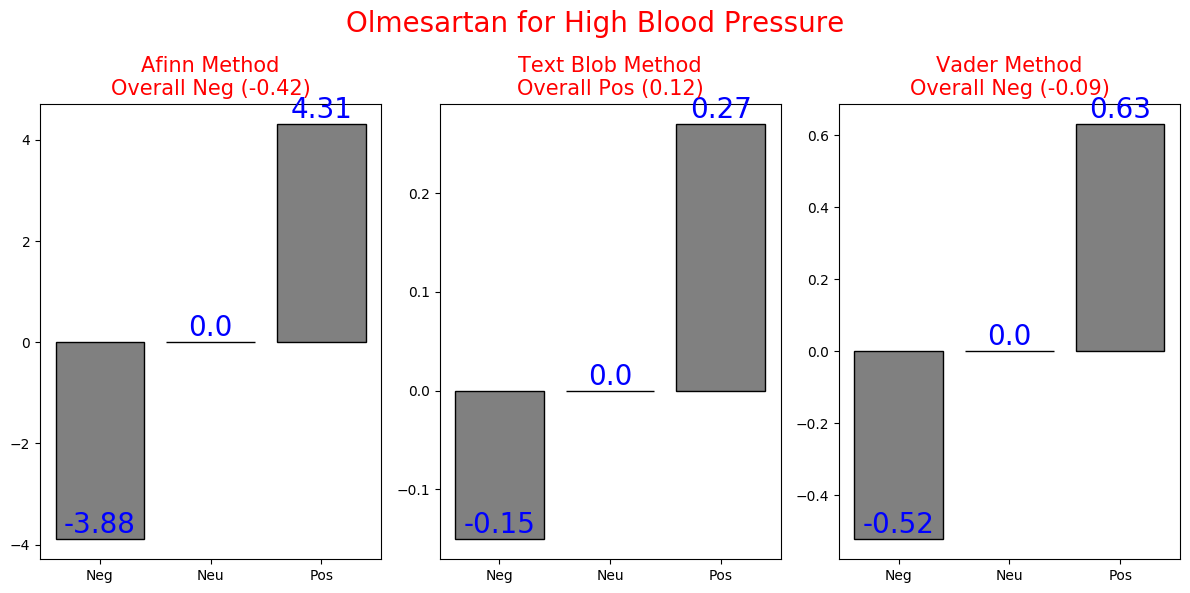

In [ ]:
con=data['condition'].unique().tolist()
c=random.choice(con)
drg=data[data['condition']==c]
drg1=drg['drugName'].unique().tolist()
d=random.choice(drg1)

drug_sentiment(c,d)

## Recomend

In [ ]:
def recomend(method,condition,n):
  name='Afinn' if method is aff else 'Text Blob' if method is blob else 'Vader'
  print(f'Sentiment Analysis Summary for {condition}\n\tUsing {name} Method')
  print('-'*30)
  print('-'*30)
  method1=method[method['condition']==condition]
  x=method1.groupby('drugName')['sent'].agg(['mean']).sort_values(by='mean',ascending=False)[:n]
  print(f'Best Recomendation For\n {condition}')
  print('-'*30)
  print(x)
  y=method1.groupby('drugName')['sent'].agg(['mean']).sort_values(by='mean',ascending=False)[-n:]
  print('-'*30)
  print('-'*30)
  print(f'Worst Recomendation For\n {condition}')
  print('-'*30)
  print(y)

In [ ]:
method=random.choice([aff,blob,vader])
condition=np.random.choice(['Depression','Diabetes, Type 2','High Blood Pressure'])

recomend(method,condition,3)

Sentiment Analysis Summary for High Blood Pressure
	Using Text Blob Method
------------------------------
------------------------------
Best Recomendation For
 High Blood Pressure
------------------------------
               mean
drugName           
Pindolol   0.650000
Plendil    0.500000
Reserpine  0.429444
------------------------------
------------------------------
Worst Recomendation For
 High Blood Pressure
------------------------------
               mean
drugName           
Labetalol -0.301071
Normodyne -0.301071
Tenex     -0.375000


# Evaluation

## Data Preparation

In [61]:
original.drop(columns=['Unnamed: 0','date'],inplace=True)
df=original[(original['condition']=='Depression')|(original['condition']=='High Blood Pressure')|(original['condition']=='Diabetes, Type 2')]
df.head()

,drugName,condition,review,rating,usefulCount
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166


In [62]:
df['t_review']=[cleaning(i) for i in df['review']]
df['sent']=df.t_review.apply(lambda x:sent(x))#5

In [63]:
df.drop(columns=['t_review'],inplace=True)
df.head()

,drugName,condition,review,rating,usefulCount,sent
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54,4
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3,-6
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3,-2
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24,4
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166,5


In [64]:
df['pos/neg']=df.sent.apply(lambda x:'Pos' if x>0 else 'Neg' if x<0 else 'Neu')
df.head()

,drugName,condition,review,rating,usefulCount,sent,pos/neg
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54,4,Pos
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3,-6,Neg
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3,-2,Neg
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24,4,Pos
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166,5,Pos


In [65]:
df.head()

,drugName,condition,review,rating,usefulCount,sent,pos/neg
11,L-methylfolate,Depression,"""I have taken anti-depressants for years, with...",10,54,4,Pos
31,Sertraline,Depression,"""1 week on Zoloft for anxiety and mood swings....",8,3,-6,Neg
44,Venlafaxine,Depression,"""my gp started me on Venlafaxine yesterday to ...",4,3,-2,Neg
50,Dulaglutide,"Diabetes, Type 2","""Hey Guys, It&#039;s been 4 months since my l...",10,24,4,Pos
67,Effexor XR,Depression,"""This medicine saved my life. I was at my wits...",10,166,5,Pos


In [66]:
feature=df['review']
target=df['pos/neg']
print(feature.shape,target.shape)

(13944,) (13944,)


In [67]:
target=pd.DataFrame(lab_enc.fit_transform(target))
target.head()

,0
0,2
1,0
2,0
3,2
4,2


In [68]:
feature=tfidf.fit_transform(feature)
feature.shape

(13944, 14165)

In [69]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=1000)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11155, 14165) (2789, 14165) (11155, 1) (2789, 1)


# Models

### Logistic Regression

In [70]:
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)
print(classification_report(y_test,y_pred))#1

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1374
           1       0.76      0.51      0.61       236
           2       0.92      0.93      0.93      1179

    accuracy                           0.91      2789
   macro avg       0.86      0.80      0.82      2789
weighted avg       0.90      0.91      0.90      2789



In [71]:
log_acc=accuracy_score(y_test,y_pred)

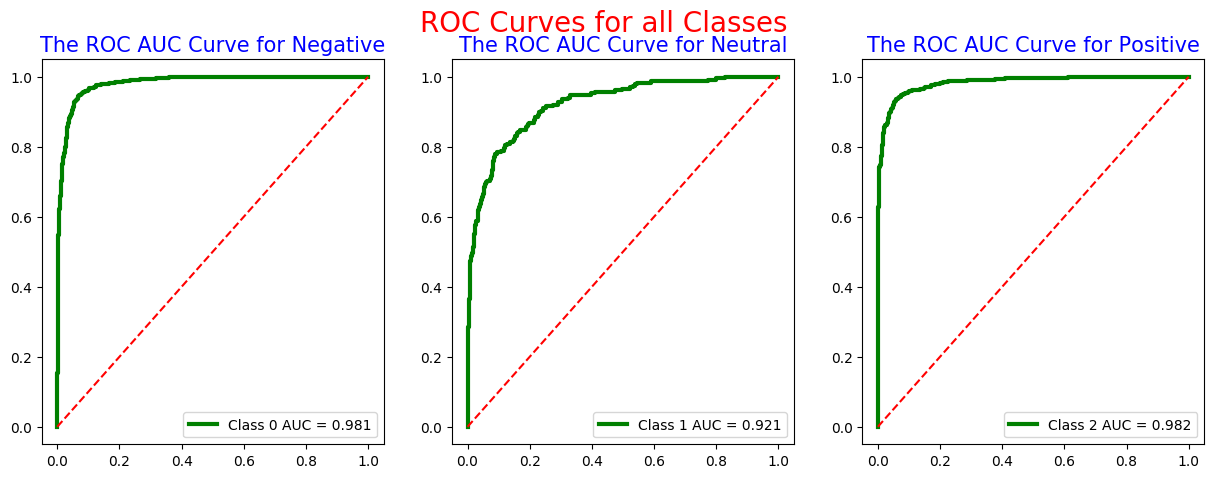

In [72]:
y_prob=log_model.predict_proba(x_test)
plt.figure(figsize=(15,5))
plt.suptitle('ROC Curves for all Classes',size=20,color='red')
for i,p in zip([0,1,2],['Negative','Neutral','Positive']):
  plt.subplot(1,3,i+1)
  lab=(y_test==i).astype(int)
  asc=roc_auc_score(lab,y_prob[:,i])
  fpr,tpr,_=roc_curve(lab,y_prob[:,i])
  plt.plot(fpr,tpr,label=f'Class {i} AUC = {asc:.3f}',lw=3,color='green')
  plt.plot([0,1],linestyle='--',color='red')
  plt.title(f'The ROC AUC Curve for {p}',color='blue',size=15)
  plt.legend()

### Support Vector Machine

In [ ]:
svc=SVC(C=1,kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1374
           1       0.83      0.25      0.38       236
           2       0.89      0.91      0.90      1179

    accuracy                           0.87      2789
   macro avg       0.86      0.70      0.73      2789
weighted avg       0.87      0.87      0.86      2789



In [ ]:
svc=SVC(C=1,kernel='sigmoid')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))#1

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1374
           1       0.84      0.11      0.20       236
           2       0.85      0.89      0.87      1179

    accuracy                           0.84      2789
   macro avg       0.84      0.64      0.65      2789
weighted avg       0.84      0.84      0.82      2789



In [ ]:
svc=SVC(C=1,kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))#2

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      1374
           1       1.00      0.51      0.67       236
           2       0.96      0.72      0.82      1179

    accuracy                           0.83      2789
   macro avg       0.90      0.74      0.78      2789
weighted avg       0.86      0.83      0.82      2789



In [ ]:
svc=SVC(C=1,kernel='rbf')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print(classification_report(y_test,y_pred))#3

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1374
           1       1.00      0.37      0.54       236
           2       0.90      0.92      0.91      1179

    accuracy                           0.89      2789
   macro avg       0.93      0.75      0.79      2789
weighted avg       0.90      0.89      0.88      2789



In [ ]:
svc_acc=accuracy_score(y_test,y_pred)

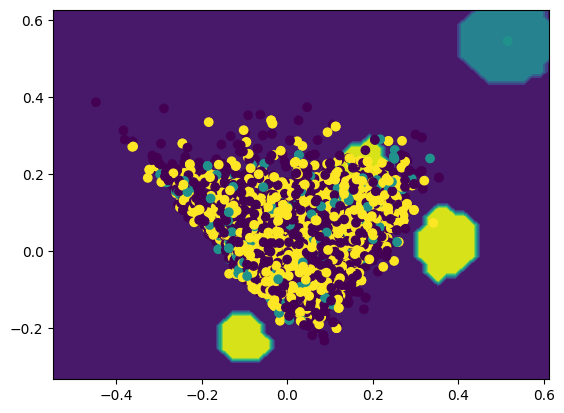

In [ ]:
pca=PCA(n_components=2)
x_train_new=pca.fit_transform(x_train)
x_test_new=pca.transform(x_test)
svc=SVC(C=1,kernel='rbf')
svc.fit(x_train_new,y_train)
y_pred=svc.predict(x_test_new)
x_min,x_max,y_min,y_max=x_train_new[:,0].min()-0.1,x_train_new[:,0].max()+0.1,x_train_new[:,1].min()-0.1,x_train_new[:,1].max()+0.1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))
dt=np.c_[np.ravel(xx),np.ravel(yy)]
z=svc.predict(dt)
z1=z.reshape(xx.shape)
plt.contourf(xx,yy,z1)
plt.scatter(x_train_new[:,0],x_train_new[:,1],c=y_train.values.ravel())

### Decision Tree

In [ ]:
dt=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.91      0.69      1374
           1       0.00      0.00      0.00       236
           2       0.73      0.32      0.45      1179

    accuracy                           0.59      2789
   macro avg       0.43      0.41      0.38      2789
weighted avg       0.58      0.59      0.53      2789



In [ ]:
dt_acc=accuracy_score(y_test,y_pred)

[Text(0.5, 0.875, 'x[6032] <= 0.084\ngini = 0.576\nsamples = 11155\nvalue = [5457, 1004, 4694]'),
 Text(0.25, 0.625, 'x[5969] <= 0.06\ngini = 0.573\nsamples = 10288\nvalue = [5295, 957, 4036]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1895] <= 0.017\ngini = 0.565\nsamples = 8911\nvalue = [4869, 868, 3174]'),
 Text(0.0625, 0.125, 'gini = 0.58\nsamples = 7954\nvalue = [4087, 839, 3028]'),
 Text(0.1875, 0.125, 'gini = 0.308\nsamples = 957\nvalue = [782, 29, 146]'),
 Text(0.375, 0.375, 'x[1895] <= 0.066\ngini = 0.508\nsamples = 1377\nvalue = [426.0, 89.0, 862.0]'),
 Text(0.3125, 0.125, 'gini = 0.477\nsamples = 1179\nvalue = [310, 79, 790]'),
 Text(0.4375, 0.125, 'gini = 0.522\nsamples = 198\nvalue = [116, 10, 72]'),
 Text(0.75, 0.625, 'x[9204] <= 0.101\ngini = 0.386\nsamples = 867\nvalue = [162, 47, 658]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[9166] <= 0.11\ngini = 0.367\nsamples = 841\nvalue = [142, 47, 652]'),
 Text(0.5625, 0.125, 'gini = 0.347\nsamples = 81

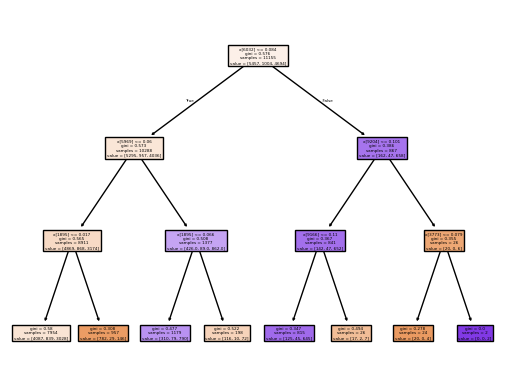

In [ ]:
plot_tree(dt,filled=True)

### Random Forest

In [ ]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini',max_features=1,max_depth=5,bootstrap=True)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66      1374
           1       0.00      0.00      0.00       236
           2       0.00      0.00      0.00      1179

    accuracy                           0.49      2789
   macro avg       0.16      0.33      0.22      2789
weighted avg       0.24      0.49      0.33      2789



In [ ]:
rf_acc=accuracy_score(y_test,y_pred)

### Ada Boost

In [ ]:
ada=AdaBoostClassifier(LogisticRegressionCV(),n_estimators=100)
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print(classification_report(y_test,y_pred))#13

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1374
           1       0.63      0.51      0.56       236
           2       0.91      0.91      0.91      1179

    accuracy                           0.89      2789
   macro avg       0.81      0.78      0.80      2789
weighted avg       0.88      0.89      0.88      2789



In [ ]:
ada_acc=accuracy_score(y_test,y_pred)

### Gradient Boost

In [ ]:
grad=GradientBoostingClassifier(n_estimators=100,max_features=1)
grad.fit(x_train,y_train)
y_pred=grad.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.99      0.67      1374
           1       0.00      0.00      0.00       236
           2       0.81      0.04      0.08      1179

    accuracy                           0.51      2789
   macro avg       0.44      0.35      0.25      2789
weighted avg       0.59      0.51      0.36      2789



In [ ]:
grad_acc=accuracy_score(y_test,y_pred)

### Xtreme Gradient Boost

In [ ]:
xg=xgb.XGBClassifier(n_estimatores=100,max_features=1)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print(classification_report(y_test,y_pred))#1

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1374
           1       0.90      0.34      0.50       236
           2       0.88      0.88      0.88      1179

    accuracy                           0.87      2789
   macro avg       0.88      0.72      0.76      2789
weighted avg       0.87      0.87      0.86      2789



In [ ]:
xg_acc=accuracy_score(y_test,y_pred)

### Light Gradient Boost

In [ ]:
lg=lgb.LGBMClassifier(n_estimators=100,max_features=1)
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print(classification_report(y_test,y_pred))#1

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.431248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 88694
[LightGBM] [Info] Number of data points in the train set: 11155, number of used features: 2136
[LightGBM] [Info] Start training from score -0.714989
[LightGBM] [Info] Start training from score -2.407896
[LightGBM] [Info] Start training from score -0.865603
[LightGBM] [Warning] Unknown parameter: max_features
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1374
           1       0.88      0.44      0.59       236
           2       0.88      0.91      0.89      1179

    accuracy                           0.88      2789
   macro avg       0.88      0.76      0.80      27

In [ ]:
lg_acc=accuracy_score(y_test,y_pred)

### Bagging

In [ ]:
bag=BaggingClassifier(LogisticRegressionCV(),n_estimators=100,bootstrap=True,bootstrap_features=True)
bag.fit(x_train,y_train)
y_pred=bag.predict(x_test)
print(classification_report(y_test,y_pred))#80

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1374
           1       0.95      0.34      0.50       236
           2       0.89      0.92      0.90      1179

    accuracy                           0.89      2789
   macro avg       0.91      0.74      0.77      2789
weighted avg       0.89      0.89      0.87      2789



In [ ]:
bag_acc=accuracy_score(y_test,y_pred)

### Artificial Neural Network

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11155, 14165) (2789, 14165) (11155, 1) (2789, 1)


In [ ]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=[14165]))
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=3,activation='softmax'))
ann.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │     1,813,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,823,683 (6.96 MB)

 Trainable params: 1,823,683 (6.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann.compile(optimizer=tf.optimizers.Adam(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
hist=ann.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=1000)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 251ms/step - accuracy: 0.5667 - loss: 1.0734 - val_accuracy: 0.7483 - val_loss: 0.9574
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.7921 - loss: 0.9117 - val_accuracy: 0.7164 - val_loss: 0.8017
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.7911 - loss: 0.7489 - val_accuracy: 0.7913 - val_loss: 0.6555
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.8439 - loss: 0.5529 - val_accuracy: 0.8196 - val_loss: 0.5194
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.8800 - loss: 0.3795 - val_accuracy: 0.8358 - val_loss: 0.4335
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - accuracy: 0.8998 - loss: 0.2620 - val_accuracy: 0.8498 - val_loss: 0.3853
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9071 - loss: 0.1908 - val_accuracy: 0.8616 - val_loss: 0.3573
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step - accuracy: 0.9340 - loss: 0.1460 - val_accuracy: 0.

In [ ]:
y_pred=ann.predict(x_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
ann_loss,ann_acc=ann.evaluate(x_test,y_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8890 - loss: 0.4504


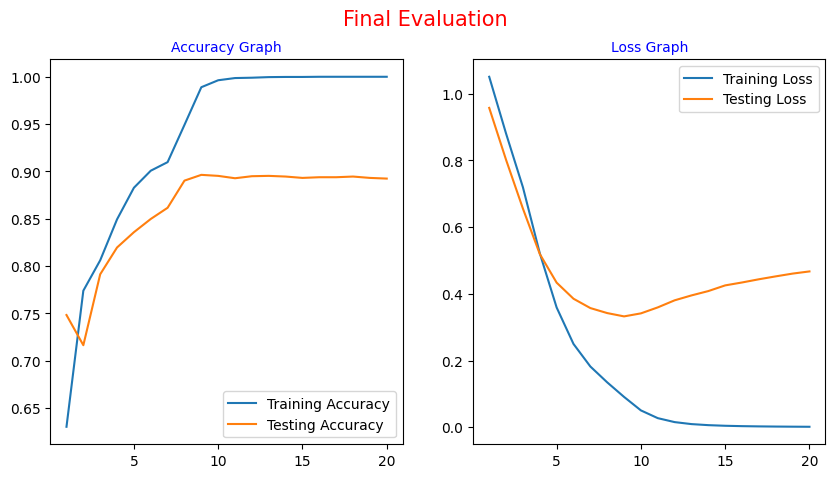

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Final Evaluation',size=15,color='red')

plt.subplot(1,2,1)
plt.title('Accuracy Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,21),hist.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['loss'],label='Training Loss')
plt.plot(range(1,21),hist.history['val_loss'],label='Testing Loss')
plt.legend()

### Reccurent Neural Network

In [ ]:
feature=df['review']
target=df['pos/neg']
target=pd.DataFrame(lab_enc.fit_transform(target))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.80,random_state=1000)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(11155,) (2789,) (11155, 1) (2789, 1)


In [ ]:
vect=TextVectorization(max_tokens=10000,output_mode='int',
output_sequence_length=10)
vect.adapt(x_train)

In [ ]:
emb=Embedding(input_dim=14165,output_dim=128,input_length=10)

In [ ]:
rnn=tf.keras.Sequential()
rnn.add(tf.keras.Input(shape=(1,),dtype=tf.string))
rnn.add(vect)
rnn.add(emb)
rnn.add(tf.keras.layers.SimpleRNN(units=128,activation='relu',return_sequences=True))
rnn.add(tf.keras.layers.SimpleRNN(units=64,return_sequences=True,activation='relu'))
rnn.add(tf.keras.layers.SimpleRNN(units=32,activation='relu'))
rnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))
rnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 10)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 128)        │     1,813,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 10, 128)        │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 10, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,861,571 (7.10 MB)

 Trainable params: 1,861,571 (7.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn.compile(optimizer=tf.optimizers.Adam(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
hist=rnn.fit(x_train.values,y_train.values,epochs=20,validation_data=(x_test.values,y_test.values),batch_size=1000)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 435ms/step - accuracy: 0.4213 - loss: 1.0309 - val_accuracy: 0.4923 - val_loss: 0.9126
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 288ms/step - accuracy: 0.4892 - loss: 0.9148 - val_accuracy: 0.5271 - val_loss: 0.9014
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 288ms/step - accuracy: 0.6149 - loss: 0.8756 - val_accuracy: 0.5421 - val_loss: 0.8763
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.6450 - loss: 0.7922 - val_accuracy: 0.5647 - val_loss: 0.8596
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 295ms/step - accuracy: 0.7134 - loss: 0.6587 - val_accuracy: 0.6027 - val_loss: 0.8382
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.7777 - loss: 0.5239 - val_accuracy: 0.6224 - val_loss: 0.8780
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - accuracy: 0.8151 - loss: 0.4209 - val_accuracy: 0.6350 - val_loss: 0.9804
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.8584 - loss: 0.3347 - val_accuracy: 0

In [ ]:
y_pred=rnn.predict(x_test.values)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
rnn_loss,rnn_acc=rnn.evaluate(x_test.values,y_test.values)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7161 - loss: 2.0586


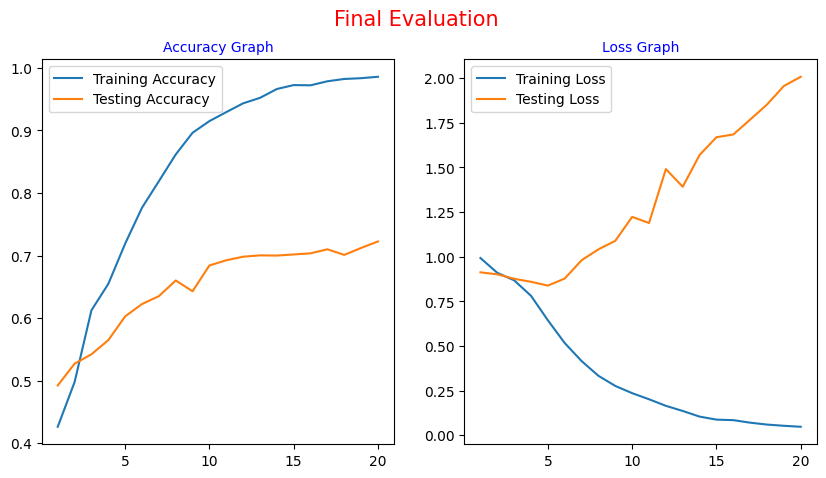

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Final Evaluation',size=15,color='red')

plt.subplot(1,2,1)
plt.title('Accuracy Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,21),hist.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['loss'],label='Training Loss')
plt.plot(range(1,21),hist.history['val_loss'],label='Testing Loss')
plt.legend()

### Long Short Term Memory

In [ ]:
lstm=tf.keras.Sequential()
lstm.add(tf.keras.Input(shape=(1,),dtype=tf.string))
lstm.add(vect)
lstm.add(emb)
lstm.add(tf.keras.layers.LSTM(units=128,activation='relu',return_sequences=True))
lstm.add(tf.keras.layers.LSTM(units=64,return_sequences=True,activation='relu'))
lstm.add(tf.keras.layers.LSTM(units=32,activation='relu'))
lstm.add(tf.keras.layers.Dense(units=3,activation='softmax'))
lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 10)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 128)        │     1,813,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,006,627 (7.65 MB)

 Trainable params: 2,006,627 (7.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm.compile(optimizer=tf.optimizers.Adam(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
hist=lstm.fit(x_train.values,y_train.values,epochs=20,validation_data=(x_test.values,y_test.values),batch_size=1000)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3888 - loss: 1.0906 - val_accuracy: 0.4973 - val_loss: 1.0239
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 934ms/step - accuracy: 0.4900 - loss: 0.9820 - val_accuracy: 0.4227 - val_loss: 0.9325
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 583ms/step - accuracy: 0.4430 - loss: 0.9289 - val_accuracy: 0.4934 - val_loss: 0.9109
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step - accuracy: 0.4918 - loss: 0.9086 - val_accuracy: 0.4991 - val_loss: 0.9015
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.4953 - loss: 0.8918 - val_accuracy: 0.5529 - val_loss: 0.8943
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.5412 - loss: 0.8596 - val_accuracy: 0.5837 - val_loss: 0.8875
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 333ms/step - accuracy: 0.5854 - loss: 0.8049 - val_accuracy: 0.5941 - val_loss: 0.8679
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.6362 - loss: 0.7398 - val_accuracy: 0.

In [ ]:
y_pred=lstm.predict(x_test.values)

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step


In [ ]:
lstm_loss,lstm_acc=lstm.evaluate(x_test.values,y_test.values)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6280 - loss: 1.7316


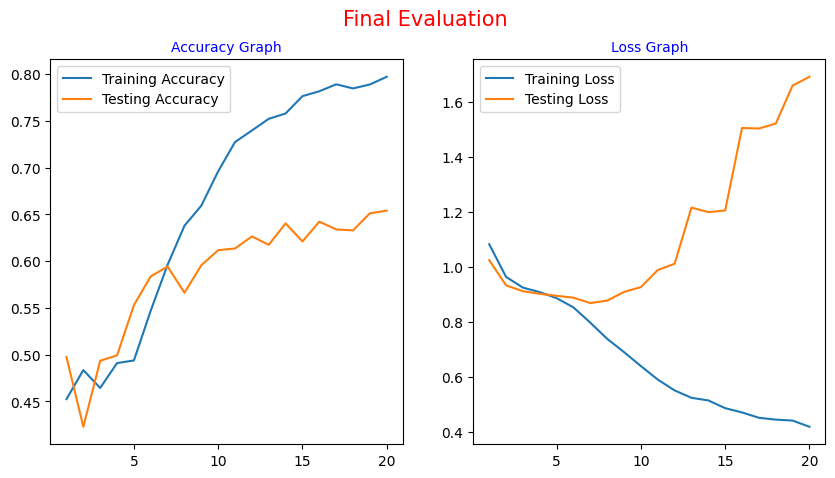

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Final Evaluation',size=15,color='red')

plt.subplot(1,2,1)
plt.title('Accuracy Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,21),hist.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['loss'],label='Training Loss')
plt.plot(range(1,21),hist.history['val_loss'],label='Testing Loss')
plt.legend()

### Gated Reccured Unit

In [ ]:
gru=tf.keras.Sequential()
gru.add(tf.keras.Input(shape=(1,),dtype=tf.string))
gru.add(vect)
gru.add(emb)
gru.add(tf.keras.layers.GRU(units=128,activation='relu',return_sequences=True))
gru.add(tf.keras.layers.GRU(units=64,return_sequences=True,activation='relu'))
gru.add(tf.keras.layers.GRU(units=32,activation='relu'))
gru.add(tf.keras.layers.Dense(units=3,activation='softmax'))
gru.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 10)             │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 128)        │     1,813,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 10, 128)        │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 10, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,958,947 (7.47 MB)

 Trainable params: 1,958,947 (7.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
gru.compile(optimizer=tf.optimizers.Adam(),loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [ ]:
hist=gru.fit(x_train.values,y_train.values,epochs=20,validation_data=(x_test.values,y_test.values),batch_size=1000)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 628ms/step - accuracy: 0.3909 - loss: 1.0854 - val_accuracy: 0.4998 - val_loss: 0.9911
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 704ms/step - accuracy: 0.5049 - loss: 0.9467 - val_accuracy: 0.5228 - val_loss: 0.8941
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 429ms/step - accuracy: 0.6035 - loss: 0.8549 - val_accuracy: 0.6124 - val_loss: 0.8293
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.6883 - loss: 0.7357 - val_accuracy: 0.6196 - val_loss: 0.8264
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.7199 - loss: 0.6432 - val_accuracy: 0.6009 - val_loss: 0.9019
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 440ms/step - accuracy: 0.7292 - loss: 0.5974 - val_accuracy: 0.6332 - val_loss: 0.8559
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - accuracy: 0.7747 - loss: 0.5264 - val_accuracy: 0.6242 - val_loss: 0.9366
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 405ms/step - accuracy: 0.7860 - loss: 0.4938 - val_accuracy: 

In [ ]:
y_pred=gru.predict(x_test.values)

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [ ]:
gru_loss,gru_acc=gru.evaluate(x_test.values,y_test.values)

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6466 - loss: 1.7441


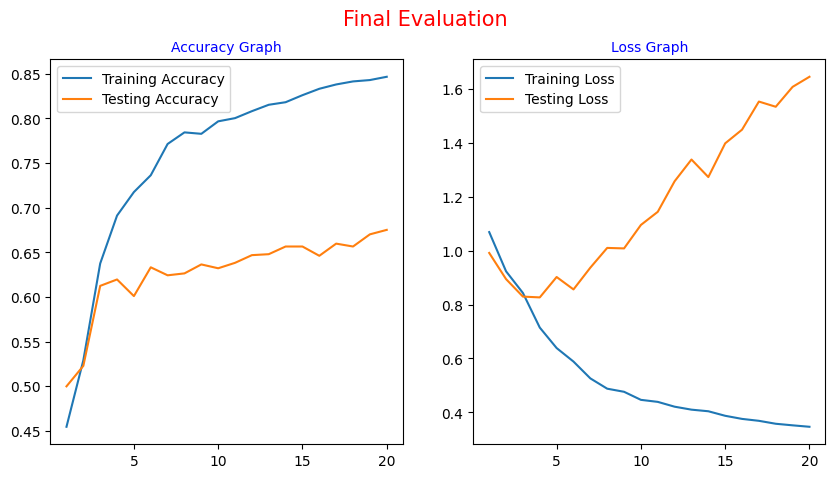

In [ ]:
plt.figure(figsize=(10,5))
plt.suptitle('Final Evaluation',size=15,color='red')

plt.subplot(1,2,1)
plt.title('Accuracy Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['accuracy'],label='Training Accuracy')
plt.plot(range(1,21),hist.history['val_accuracy'],label='Testing Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.title('Loss Graph',size=10,color='blue')
plt.plot(range(1,21),hist.history['loss'],label='Training Loss')
plt.plot(range(1,21),hist.history['val_loss'],label='Testing Loss')
plt.legend()

## Comparison

In [ ]:
comp={'Model':['Logistic Regression','Support Vector Machine','Decision Tree Calssifier','Random Forest Classifier','Ada Boost Classifier','Gradient Boost Classifier','Xtreme Gradient Boost Classifier','Light Gradient Boost Classifier','Bagging Classifier','Artificial Neural Network','Recurrent Neural Network','Long Short Term Memory','Gated Recurrent Unit'],'Accuracy':[round(log_acc*100,2),round(svc_acc*100,2),round(dt_acc*100,2),round(rf_acc*100,2),round(ada_acc*100,2),round(grad_acc*100,2),round(xg_acc*100,2),round(lg_acc*100,2),round(bag_acc*100,2),round(ann_acc*100,2),round(rnn_acc*100,2),round(lstm_acc*100,2),round(gru_acc*100,2)]}
comparison=pd.DataFrame(data=comp)
comparison.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
0,Logistic Regression,90.75
1,Support Vector Machine,89.24
9,Artificial Neural Network,89.17
4,Ada Boost Classifier,88.67
8,Bagging Classifier,88.60
7,Light Gradient Boost Classifier,88.10
6,Xtreme Gradient Boost Classifier,86.70
10,Recurrent Neural Network,72.97
12,Gated Recurrent Unit,66.98
11,Long Short Term Memory,64.72


In [ ]:
print(log_acc,svc_acc,dt_acc,rf_acc,ada_acc,grad_acc,xg_acc,lg_acc,bag_acc,ann_acc,rnn_acc,lstm_acc,gru_acc)
#0.9074937253495877 0.8924345643599857 0.5905342416636787 0.49264969523126567 0.8866977411258515 0.5080674076730011 0.8669774112585156 0.8809609178917175 0.8859806382215848 0.8917174339294434 0.7296522259712219 0.6471853852272034 0.6697741150856018

0.9074937253495877 0.8924345643599857 0.5905342416636787 0.49264969523126567 0.8866977411258515 0.5080674076730011 0.8669774112585156 0.8809609178917175 0.8859806382215848 0.8917174339294434 0.7296522259712219 0.6471853852272034 0.6697741150856018


# Deployment

## Condition Modeling

In [73]:
feat=df['review']
targ=df['condition']

In [74]:
le=LabelEncoder()
targ=pd.DataFrame(le.fit_transform(targ))
targ.head()

,0
0,0
1,0
2,0
3,1
4,0


In [75]:
feat=tfidf.fit_transform(feat)
feat.shape

(13944, 14165)

In [76]:
lm=LogisticRegressionCV()
lm.fit(feat,targ)

LogisticRegressionCV()

In [113]:
lab='labeling.pkl'
pickle.dump(le,open(lab,'wb'))
lab_m='lab_model.pkl'
pickle.dump(lm,open(lab_m,'wb'))

In [114]:
file='log_model.pkl'
pickle.dump(log_model,open(file,'wb'))
vect='tfidf.pkl'
pickle.dump(tfidf,open(vect,'wb'))

In [115]:
ngrok_key=getpass.getpass('Enter ngrok key => ')

Enter ngrok key => ··········


## Final Deployment

In [122]:
%%writefile deploy.py

import streamlit as st
import pickle
import pandas as pd

model=pickle.load(open('log_model.pkl','rb'))
tfi=pickle.load(open('tfidf.pkl','rb'))
labe=pickle.load(open('labeling.pkl','rb'))
lab_mo=pickle.load(open('lab_model.pkl','rb'))

st.set_page_config(layout="wide")
st.title('Sentiment Analysis')
col_l,col_r=st.columns([3,1])

with col_l:
  input=st.text_area('Enter your Text here......',height=500)

label={0:'Negative',1:'Neutral',2:'Positive'}

with col_r:
  if st.button('Predict Sentiment'):
    vector=tfi.transform([input])
    pred=model.predict(vector)[0]
    pred_prob=model.predict_proba(vector)
    c_pred=lab_mo.predict(vector)[0]
    c_label=labe.inverse_transform([c_pred])[0]
    sent_label=label[pred]
    neg,neu,pos=pred_prob[0]

    if pred==2:
      st.write(f'Positive Sentiment')
      st.write(f'Most likely for {c_label}')
    if pred==1:
      st.write(f'Neutral Sentiment')
      st.write(f'Most likely for {c_label}')
    if pred==0:
      st.write(f'Negative Sentiment')
      st.write(f'Most likely for {c_label}')

    tab={'Sentiment':['Positive','Neutral','Negative'],'Probability':[round(pos*100,2),round(neu*100,2),round(neg*100,2)]}
    st.table(pd.DataFrame(tab))

Overwriting deploy.py


In [123]:
port=8501
ngrok.set_auth_token(ngrok_key)
ngrok.connect(port).public_url

'https://unsulfureous-camelia-superethically.ngrok-free.dev'

In [124]:
!rm -f logs.txt && streamlit run deploy.py >/content/logs.txt 2>&1

In [ ]:
# Some sample reviews

# I have been taking Jardiance for just over a year - I have NOT experienced any side effects whatsoever - MORE importantly this drug has reduced my blood sugar levels to an average of 5 and has maintained this level, quite incredible as nothing else has worked previously - I have named Jardiance as the &quot;diabetic wonder drug&quot; although my Doctor keeps reminding me there is no such thing as a wonder drug - I disagree this is MY wonder drug - thank you Jardiance you have changed my life completely astonishing result.

# It has worked so far for me and I would recommend it to anyone suffering with depression.

# Using this for parasomnia, bph and bp. Kind of silver bullet. But my new doc tried to give me the brand name... Is it an extended release or just much more expensive? I only take it at night and dizziness hasnt been an issue. Seems to work as well as other bph meds that I have tried, my bp has also been reasonable. Seems to make sleepwalking more infrequent which is why I tried it.

# Started this last night. I have zero appetite. How is this possible? I love food, but I don&039;t really feel like eating. All I&039;ve had today is some grapes. I have a sandwich in my lunchbox, but I don&039;t have any appetite. I haven&039;t had any of the side effects so far. I started with the 1.2 dose. The &quot;pen&quot; is really easy to use compared to my intramuscular testosterone. However, this drug is ridiculously expensive. Even with good insurance, I would have to pay almost $400 a MONTH!!! Fortunately, another serious illness pushed me over my out-of-pocket annual. So, I filled the script for $0. Due to politics I may have no insurance next year. Anyway, so far, so good with Victoza.

# Worked beautifully in reducing my BP from 190/104 down to normotensive readings of 120/72. However, as with the other meds that were tried, I had intolerable side effects like GERD, abdominal bloating and malaise. My internal med PA-C changed me to Losartan (since the ARB class of drug relieved my hypertension) but this time without the HCT diuretic, and the results have been wonderful. Same BP effect without the high cost (luckily we trialed the Benicar HCT with professional free samples!), side effects, or need to excessively hydrate to balance the diuretic.

# This medication is amazing! After 3 days of being extremely sick, I started to feel amazing, I am now 1 month into it and am so happy all the time and have no depressive thoughts at all. It kind of blocks out any sad thoughts. Works perfectly for me.

# I've been on Metformin for six months. On the positive side, my A1C dropped from 8.4 to 6.2, which my doctor is thrilled about. However, the 'Metformin runs' are no joke. I have constant bloating and stomach cramps that make it hard to leave the house. It's a love-hate relationship; the drug does exactly what it's supposed to do for my blood sugar, but the GI side effects are making me consider switching to something else.

# Invokana was a disaster for me!  First on Invokamet, also bad!  Had GI problems with Invokamet.  Dr, switched me to Invokana.  Worse GI problems.  Developed anal fissures from the diarrhea and constipation.  Now have yeast infection.  Back on Metformin and exercise.  Numbers are better!

# I work nights so I took my 2nd dose of the day at 1am. By the time I saw the doctor at 8am, my blood pressure was 160/110. It doesn&#039;t work for me. I get no benefit, and most of the side effects.

# Venlafaxine made me, dizzy, gave me nausea and diarrhea. My anxiety increased because of the severe stomach distress this medication caused me.I felt all around lousy. Took medication for 2 months hoping the symptoms would subside. The problems just got worse.


# The first two weeks were absolute hell. I had increased anxiety, cold sweats, and couldn't sleep at all. I almost quit, but my therapist urged me to stick it out. Around week five, the clouds finally lifted. I don't feel 'numb,' I just feel like myself again. If you're just starting, please give it at least a month before you give up. It takes time for your brain to adjust.

# Absolute disaster. Took it at 10 PM, and by midnight I was 'sleep-eating' an entire box of cereal in the kitchen. My husband found me trying to fold the laundry while I was still out cold. I woke up feeling like a zombie with a massive headache. Never again. I'd rather stay awake than deal with the scary parasomnia this caused.

# It's okay. Doesn't work as well as the stronger stuff, but it's better than taking nothing at all. I haven't noticed any weird symptoms yet. I'll keep taking it for another week and see if anything changes.

# It's okay. Doesn't work as well as the stronger stuff, but it's better than taking nothing at all. I haven't noticed any weird symptoms yet. I'll keep taking it for another week and see if anything changes.